<a href="https://colab.research.google.com/github/dcoder0111/CSC630_ContextFreeGrammarProject/blob/main/CFG_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC630_ContextFreeGrammarProject
#### Authors: Alex Zhang, Dakota Chang, Glen Cahilly, Nishani Clarke
#### Sources: https://web.stanford.edu/class/archive/cs/cs103/cs103.1156/tools/cfg/, https://www.nltk.org/
#### Last Edited: 12 Jan, 2023
---

In this project, we use the nltk library to generate sentences using the structure/grammar used by the characters as listed below.
Characters covered: Minions, Yoda, and Dr. Kington.


In [3]:
# @title Importing Files
!git clone https://github.com/dcoder0111/CSC630_ContextFreeGrammarProject CFG_Files

Cloning into 'CFG_Files'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 80 (delta 25), reused 19 (delta 2), pack-reused 0
Unpacking objects: 100% (80/80), 1.30 MiB | 6.94 MiB/s, done.


In [4]:
# @title Importing libraries
# CFG
import nltk
from nltk.parse.generate import generate, demo_grammar
# Meme
from PIL import Image
from PIL import Image, ImageDraw, ImageFont
import random
import textwrap
# Display Email
from IPython.display import display, HTML, IFrame

---

# Example of NLTK library usage

In [5]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det N | NP PP
    VP -> V NP | VP PP
    PP -> P NP
    Det -> 'the' | 'a'
    N -> 'dog' | 'cat' | 'man' | 'woman' | 'park'
    V -> 'chases' | 'barks'
    P -> 'in' | 'on'
""")

# Create an Earley parser
parser = nltk.EarleyChartParser(grammar)

# Generate a sentence
sentence = "the man chases the dog in the park"
tokens = sentence.split()

# Parse the sentence
for tree in parser.parse(tokens):
    print(tree)

(S
  (NP (Det the) (N man))
  (VP
    (VP (V chases) (NP (Det the) (N dog)))
    (PP (P in) (NP (Det the) (N park)))))
(S
  (NP (Det the) (N man))
  (VP
    (V chases)
    (NP (NP (Det the) (N dog)) (PP (P in) (NP (Det the) (N park))))))


In [6]:
parser = nltk.ChartParser(grammar)
for tree in parser.parse(tokens):
  print(tree)

(S
  (NP (Det the) (N man))
  (VP
    (VP (V chases) (NP (Det the) (N dog)))
    (PP (P in) (NP (Det the) (N park)))))
(S
  (NP (Det the) (N man))
  (VP
    (V chases)
    (NP (NP (Det the) (N dog)) (PP (P in) (NP (Det the) (N park))))))


---

# First Character: Minion

## Text Generation

In [7]:
# @title Define the grammar
minion_grammar = nltk.CFG.fromstring("""
MAIN -> SENTENCE '!' | QUESTION '?'
_ -> ' '

QUESTION -> 'La' _ OBJ _ MOD ',' _QUESTIONWORD | NAME _ VERB _ ARTICLE _ OBJ

QUESTIONWORD -> 'huh' | 'que'

SENTENCE -> SUB _ VERB _ ARTICLE _ OBJ _ MOD | 'Bello' _ NAME ', tu' _ VERB _ ARTICLE _ OBJ ',' _ INTERJECTION | 'Cest' _ ARTICLE _ OBJ ',' _ INTERJECTION | INTERJECTION ',' _ SENTENCE

SUB -> 'Tatata' | 'Tulaliloo' | 'Tu' | 'Me'

VERB -> 'choose' | 'like' | 'want' | 'assemble'

INTERJECTION -> 'Yum yum' | 'Bye bye' | 'Bello' | 'HAHAHAHA' | 'Hey' _ NAME | 'Bank yu' | 'Ahhhh ok' | 'Woohoo'

MOD -> 'con' _ ARTICLE OBJ | 'para tu' | 'muy bueno'

ARTICLE -> 'la'

OBJ -> 'papaya' | 'papagena and' _ ARTICLE _ OBJ | 'banana' | 'piñata' | 'big boss' | 'baboi and' _ ARTICLE _ OBJ | 'minions' | 'shrink ray'

NAME -> 'Mel' | 'Stuart' | 'Kevin' | 'King Bob' | 'Gru' | 'Vector' | 'sucker'
""")

# Create an Earley parser
minion_parser = nltk.EarleyChartParser(minion_grammar)

all_minion_speeches = []

# Generate 10 sentences
# for sentence in generate(minion_grammar, n=10):
#   print(''.join(sentence))

# Generate all sentences with length 5
for sentence in generate(minion_grammar, depth=5):
  all_minion_speeches.append(''.join(sentence))

In [8]:
# @title Meme Generation Methods (Minions)
def minion1(text):
  im = Image.open("CFG_Files/images/minion/minion1.jpeg")
  draw = ImageDraw.Draw(im)
  text = text
  font_type = ImageFont.truetype("CFG_Files/arial.ttf", 20)  
  draw.text((290, 150), text, (0, 0, 0), font=font_type)  # "draw.text(LOCATION, TEXT, COLOR, FONT_TYPE)"
  return im

def minion2(text):
  im = Image.open("CFG_Files/images/minion/minion2.jpeg")
  draw = ImageDraw.Draw(im)
  text = text
  font_type = ImageFont.truetype("CFG_Files/arial.ttf", 10)  
  draw.text((50, 150), text, (255, 255, 255), font=font_type)  # "draw.text(LOCATION, TEXT, COLOR, FONT_TYPE)"
  return im

def minion3(text):
  im = Image.open("CFG_Files/images/minion/minion3.png")
  draw = ImageDraw.Draw(im)
  text = text
  font_type = ImageFont.truetype("CFG_Files/arial.ttf", 30)  
  draw.text((90, 500), text, (0, 0, 0), font=font_type)  # "draw.text(LOCATION, TEXT, COLOR, FONT_TYPE)"
  return im

def split_long_sentence(text, number):
  text_array = text.split(' ')
  if len(text_array) >= number:
    new_text = ''
    for i in range(len(text_array)%number):
      print(i)
      new_text += (' '.join(text_array[number*i:number*(i+1)]))
      new_text += '\n'
  else: 
    new_text = text
  return new_text

## Generate Meme

0


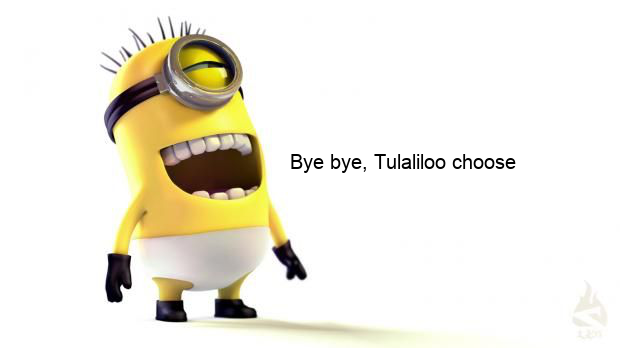

In [9]:
# @title Generate Minion Meme
text = random.choice(all_minion_speeches)
choices = [1,2,3]
choice = random.choice(choices)
if choice == 1:
  im = minion1(split_long_sentence(text, 4))
elif choice == 2:
  im = minion2(split_long_sentence(text, 9))
elif choice == 3:
  im = minion3(split_long_sentence(text, 9))

im

---
# Second Character: Yoda Blue Book

## Text generation

In [10]:
# @title Define the grammar
dont_grammar = nltk.CFG.fromstring("""
S -> DONTOBJ ","

DONTOBJ -> "GLANCE BRIEFLY AT ONES MOBILE TELEPHONE DURING THE HUMBLE HOURS OF ALL SCHOOL MEETING" | "PERUSE PORNOGRAPHIC MATERIALS ON SCHOOL WI-FI" | "HAVE UNPROTECTED SEXUAL RELATIONS IN " PLACE | "HAZE FRESHMEN" | "DEPART ONES DORMITORY RESIDENCE AFTER THE LATE HOUR OF 9:30 P.M." | "DISTRIBUTE RUSSIAN NOOTROPIC RESEARCH CHEMICALS AMONG FRESHMEN FOR CLOUT" | "COVERTLY DEAL " SUBSTANCE  " IN " PLACE | "INGEST " SUBSTANCE " DURING ALL SCHOOL MEETING"

SUBSTANCE -> "COCAINE" | "SPECIAL K" | "MOLLY" | "SYRINGES OF BLACK TAR HEROIN" | "CRYSTAL METH" | "LEAN" | "EXORBITANT AMOUNTS OF SHROOMS" | "MORPHINE" | "HYDROCODONE" | "ADDY" | "TABS" | "DOPE" | "KUSH"

PLACE -> "THE PYTHAGOREAN ARBOR" | "THE GRAVES PRACTICE ROOMS" | "THE COCHRAN CHAPEL BASEMENT" | "THE SAMUEL PHILLIPS HALL 1ST FLOOR ALL-GENDER BATHROOM" | "THE ELSON BATHROOMS" | "THE PHOTOGRAPHY DARK ROOM" | "THE PAN CENTER HOT TUB" | "THE CEMETERY"

""")

subj_grammar = nltk.CFG.fromstring("""

S -> SUBJECT " " HELPERVERB " NOT."

SUBJECT -> "YOU" | "STUDENTS" | "MY FELLOW BRETHREN OF THE PHILLIPS ACADEMY ANDOVER COMMUNITY, YOU"
          
HELPERVERB -> "MUST"

""")

dont_parser = nltk.EarleyChartParser(dont_grammar)
subj_parser = nltk.EarleyChartParser(subj_grammar)

all_dont1 = []
all_dont2 = []
all_subj = []

# Generate all sentences with length 5
for sentence in generate(dont_grammar, depth=3):
  all_dont1.append(''.join(sentence)) 
for sentence in generate(dont_grammar, depth=4):
  all_dont2.append(''.join(sentence)) 

for sentence in generate(subj_grammar, depth=4):
  all_subj.append(''.join(sentence))

# print(all_dont)
# print(all_subj)
print(all_dont1)
print(all_dont2)

# Print random sentence
print(random.choice(all_dont1))
print(random.choice(all_dont2))
# print(random.choice(all_subj))

['GLANCE BRIEFLY AT ONES MOBILE TELEPHONE DURING THE HUMBLE HOURS OF ALL SCHOOL MEETING,', 'PERUSE PORNOGRAPHIC MATERIALS ON SCHOOL WI-FI,', 'HAZE FRESHMEN,', 'DEPART ONES DORMITORY RESIDENCE AFTER THE LATE HOUR OF 9:30 P.M.,', 'DISTRIBUTE RUSSIAN NOOTROPIC RESEARCH CHEMICALS AMONG FRESHMEN FOR CLOUT,']
['GLANCE BRIEFLY AT ONES MOBILE TELEPHONE DURING THE HUMBLE HOURS OF ALL SCHOOL MEETING,', 'PERUSE PORNOGRAPHIC MATERIALS ON SCHOOL WI-FI,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE PYTHAGOREAN ARBOR,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE GRAVES PRACTICE ROOMS,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE COCHRAN CHAPEL BASEMENT,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE SAMUEL PHILLIPS HALL 1ST FLOOR ALL-GENDER BATHROOM,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE ELSON BATHROOMS,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE PHOTOGRAPHY DARK ROOM,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE PAN CENTER HOT TUB,', 'HAVE UNPROTECTED SEXUAL RELATIONS IN THE CEMETERY,', 'HAZE FRESHME

In [11]:
# @title Meme Generation Methods
def yoda1(text):
  im = Image.open("CFG_Files/images/yoda/yoda1.jpeg")
  draw = ImageDraw.Draw(im)
  text = text
  font_type = ImageFont.truetype("CFG_Files/arial.ttf", 35)  
  draw.text((40, 90), text, (255, 255, 0), font=font_type)  # "draw.text(LOCATION, TEXT, COLOR, FONT_TYPE)"
  return im

def yoda2(text):
  im = Image.open("CFG_Files/images/yoda/yoda2.jpeg")
  draw = ImageDraw.Draw(im)
  text = text
  font_type = ImageFont.truetype("CFG_Files/arial.ttf", 40)  
  draw.text((200, 550), text, (255, 255, 255), font=font_type)  # "draw.text(LOCATION, TEXT, COLOR, FONT_TYPE)"
  return im

def yoda3(text):
  im = Image.open("CFG_Files/images/yoda/yoda3.jpeg")
  draw = ImageDraw.Draw(im)
  text = text
  font_type = ImageFont.truetype("CFG_Files/arial.ttf", 40)  
  draw.text((620, 200), text, (255, 255, 255), font=font_type)  # "draw.text(LOCATION, TEXT, COLOR, FONT_TYPE)"
  return im

def split_long_sentence(text, number):
  text_array = text.split(' ')
  if len(text_array) >= number:
    new_text = ''
    for i in range(len(text_array)%number):
      print(i)
      new_text += (' '.join(text_array[number*i:number*(i+1)]))
      new_text += '\n'
  else: 
    new_text = text
  return new_text

In [12]:
# @title Meme Generation Method
def yodaKington(toptext, bottomtext):
  toptext = toptext
  toppara = textwrap.wrap(toptext, width=30)

  bottomtext = bottomtext
  bottompara = textwrap.wrap(bottomtext, width=30)

  MAX_W, MAX_H = 512, 497
  im = Image.open("CFG_Files/images/YodaKington/YodaKington.png")
  draw = ImageDraw.Draw(im)
  font = ImageFont.truetype(
    '/content/CFG_Files/impact.ttf', 25)

  current_h, pad = 497, 10
  for line in toppara:
      w, h = draw.textsize(line, font=font)
      draw.text(((MAX_W - w) / 2, current_h-500), line, font=font, fill=(255, 255, 255), stroke_width=6, stroke_color=(255,255,255), stroke_fill=(0,0,0))
      current_h += h + pad

  current_h, pad = 497 - 100 - len(bottomtext)*1.3, 10
  for line in bottompara:
      w, h = draw.textsize(line, font=font)
      draw.text(((MAX_W - w) / 2, current_h+60), line, font=font, fill=(255, 255, 255), stroke_width=6, stroke_color=(255,255,255), stroke_fill=(0,0,0))
      current_h += h + pad

  return im


## Generate Meme

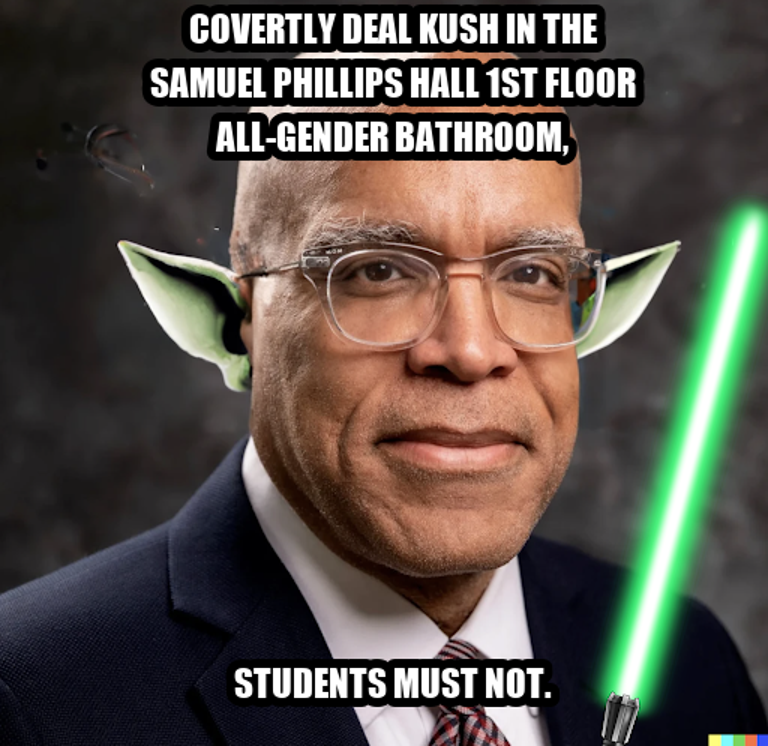

In [13]:
# @title Generate Yoda Kington Meme

toptext = ''
if random.randint(0, 1)==1:
  toptext = random.choice(all_dont1)
else:
  toptext = random.choice(all_dont2)
  
bottomtext = random.choice(all_subj)

im = yodaKington(toptext, bottomtext)

im = im.resize((768,746))

im

---
# Third Character: "We Can and Must Do Better" Email Generator

## Text Generation

In [14]:
# @title Define the email grammar
email_grammar = nltk.CFG.fromstring('''
    MAIN -> SUBJECT NEWL BODY NEWL SIGNOFF
    NEWL -> "<br>"
    SUBJECT -> "re: Vandalism " PLACE | "re: Do better." | "re: A message to the community" | "re: A call for action" | "re: Remembering our non-sibi spirit"
    PLACE -> "in the Commons bathroom" | "in the third booth of the Den" | "in the first floor of the Library" | "on the Great Lawn" | "in the Sanctuary" | "in the basement of Morse" | "in the depths of the Garver Room" | "on top of the water fountain behind the Kemper Auditorium"
    BODY -> INTRO NEWL SHIFT TRAGEDY NEWL ACTION NEWL THANKS
    INTRO -> "Dear Andover Community, " NEWL "I hope your " PASTTIME " has been " ADJ ". It has been " ADJ " seeing students around campus in these first few days of " TERM ". " | "Dear Student Body (copy to parents and guardians,  " NEWL " I hope you\’re well. The beginning of " TERM " has always been filled with joy and excitement, which has been apparent these first days back. "
    PASTTIME -> "break" | "weekend" | "week" | "time away"
    ADJ -> "amazing" | "wonderful" | "splendid" | "terrific" | "delightful" | "incredible"
    TERM -> "Fall Term" | "Winter Term" | "Spring Term"
    SHIFT -> INTERJECTION ", " VERBP ". " | INTERJECTION "," " I write this " TIME " with a lowlight of the day and a brief, " IMPORTANCEADJ " reminder about " BIGWORD ". "
    INTERJECTION -> "Unfortunately" | "Sadly" | "Tragically" | "However" | "Ignominiously"
    VERBP -> "this email does not come in good spirits" | CATASTROPHICADJ " act of vandalism has ravaged our " PEACEADJ " " GROUP 
    CATASTROPHICADJ -> "a catastrophic" | "a dire" | "a rotten" | "an egregious" | "a diabolical" | "a vile, vulgar, and villainous"
    PEACEADJ -> "peaceful" | "bloodless" | "tranquil" | "placid" | "serendipitous" | "neighborly" | "communal"
    GROUP -> "community" | "institution" | "establishment" | "society" | "Big Blue home"
    TIME -> "afternoon" | "evening" | "morning"
    IMPORTANCEADJ -> "important" | "critical" | "crucial" | "paramount" | "pivotal" | "vital" | "momentous" | "climacteric" | "urgent"
    BIGWORD -> "responsibility" | "accountability" | "your duty to the community" | "place in our community" | "your non-sibi values"
    TRAGEDY ->  "As you can see from the attached image, there has been " SIZEADJ " amount of " THING " left " PLACE ". This is unacceptable. " | "I have discovered " SIZEADJ " amount of " THING " festering " PLACE ". PACS has been alerted and the individuals involved in this " TRAGEDYWORD " should come forth now, lest they wish to receive " SIZEADJ " punishment later. " | "PACS has uncovered " SIZEADJ " amount of " THING " suppurating " PLACE ", "  CATASTROPHICADJ " " TRAGEDYWORD " that the likes of have not been seen on this campus in years. "
    TRAGEDYWORD -> "calamity" | "tragedy" | "disaster" | "crime" | "offense"
    SIZEADJ -> "an egregious" | "a horrifying" | "a frightening" | "an alarming" | "a catastrophic" | "a dire" | "a rotten" | "a diabolical" | "a vile, vulgar, and villainous"
    THING -> "spilt milk" | "barbeque sauce" | "open green containers" | "food" | "garbage" | "spicy chimichurri mayonnaise" | "maruchan ramen containers" | "condoms" 
    ACTION -> "Moving forward, we must " ACTIONVERB ". Be " RESPONSIBLEADJ ", " RESPONSIBLEADJ ", and " RESPONSIBLEADJ ". " | "When we accepted you into our " PEACEADJ " " GROUP ", we assumed that you would adhere to our core school values and be " RESPONSIBLEADJ ", " RESPONSIBLEADJ ", and " RESPONSIBLEADJ ". " 
    ACTIONVERB -> "take greater responsibility for ourselves and this campus" | "be mindful of our presence in this " GROUP " and hold each other accountable" | "be better and do better" | "remember our non sibi spirit"
    RESPONSIBLEADJ -> "conscious" | "watchful" | "responsible" | "aware of your impact" | "dutiful" | "considerate" | "attentive" | "charitable" | "mindful" | "careful" | "vigilant" | "thoughtful" | "alert" | "cognizant" | "present" | "respectful"
    THANKS -> "With this note, I send gratitude to the " ADJ " " STUDENTWORD " who came across this disgusting scene and, without prompting, " STUDENTVP ". Thank you for being such " ROCKWORD ". To everyone else, step it up." | "Students, you will have multiple opportunities in the weeks ahead to redeem yourselves. After this deliberate practice, make it a habit. Step it up." | "For the " ADJ " " STUDENTWORD " who " STUDENTVP " without being asked, thank you for your service. Other students, learn from these " ROCKWORD " and be " RESPONSIBLEADJ ". "
    STUDENTWORD -> "students" | "leaders" | "scholars" | "non sibi advocates" | "upstanders" | "activists"
    ROCKWORD -> "champs" | "G.O.A.T.S" | "rock stars"
    STUDENTVP -> "immediately dropped what they were doing and cleaned up the " CATASTROPHICADJ TRAGEDYWORD | "took precious time out of their day to " CLEANVERB " our " PEACEADJ " " GROUP | "took non sibi to heart and upheld the values of our " GROUP
    CLEANVERB -> "protect" | "preserve the sanctity of" | "purify" | "maintain"
    SIGNOFF -> "With optimism,<br>" NAME | "With confidence in you,<br>" NAME | NAME | "With hope,<br>" NAME | "One love,<br>" NAME | "Veni vidi vici,<br>" NAME | "Finis origine pendet,<br>"  NAME | "Carpe diem,<br>" NAME 
    NAME -> "Dr. Kington" | "Susan Tsao Esty, PhD, P 2022 (she/her)"
''')

# Create an Earley parser
email_parser = nltk.EarleyChartParser(email_grammar)

all_emails = []

# Generate all sentences with depth 5
for sentence in generate(email_grammar, depth=20):
  all_emails.append(''.join(sentence))
  if len(all_emails) >= 800000:
    break

In [16]:
# @title Fonts
def font_impact(input):
  ret = '''<p style="font-size:30px; font-family: Impact,Haettenschweiler,Franklin Gothic Bold,Charcoal,Helvetica Inserat,Bitstream Vera Sans Bold,Arial Black,sans serif; 
">'''
  ret+= input
  ret+= "<p>"
  return ret

def font_times(input):
  ret = '''<p style="font-size:20px; font-family: "Times New Roman", Times; 
">'''
  ret+= input
  ret+= "<p>"
  return ret

## Generate Email

In [18]:
# @title Display Email
email_html = random.choice(all_emails)
frags = []  
display(HTML(font_times(email_html)))